In [1]:
import numpy as np
import h5py
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors

/gpfs/runtime/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 25

In [3]:
path_list = ["/users/czhang54/scratch/tf_analysis/tf_vs_t_ret_70_0_003.csv",
             "/users/czhang54/scratch/tf_analysis/tf_vs_t_ret_72_0_003.csv",
             "/users/czhang54/scratch/tf_analysis/tf_vs_t_ret_75_0_003.csv", 
             "/users/czhang54/scratch/tf_analysis/tf_vs_t_ret_79_0_003.csv",
             "/users/czhang54/scratch/tf_analysis/tf_vs_t_ret_81_0_003.csv",
             "/users/czhang54/scratch/tf_analysis/tf_vs_t_ret_95_0_003.csv",
             "/users/czhang54/scratch/tf_analysis/tf_vs_t_ret_120_0_003.csv"]

In [4]:
nu = 0.00020704166
ret_list = [70, 72, 75, 79, 81, 95, 120]
dpdz_list = [4*(2*nu*i/0.5)**2 for i in ret_list]

In [5]:
data_list = [pd.read_csv(path_list[i]) for i in range(len(path_list))]

In [6]:
tf_list = np.zeros(len(path_list))
error_list = np.zeros(len(path_list))

In [7]:
for i in range(len(path_list)):
    tf_list[i] = data_list[i]['Turbulence Fraction'].mean()
    error_list[i] = data_list[i]['Turbulence Fraction'].std()
print(tf_list, error_list)

[0.00000000e+00 1.79241271e-06 2.61043742e-01 3.09975822e-01
 3.53128998e-01 4.20745809e-01 4.78029590e-01] [0.00000000e+00 5.58258360e-06 7.61876301e-02 7.56552755e-02
 8.64864203e-02 8.14611248e-02 5.31143726e-02]


In [8]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
x = np.arange(10)

ax.errorbar(dpdz_list[2:], tf_list[2:], yerr=error_list[2:], color = 'blue', ecolor = 'blue', ls = '--', marker = 'o', 
             markersize=8, mfc = 'blue', capsize=10)
ax.grid()
plt.xlabel('|Pressure Gradient|')
plt.ylabel('Turbulence Fraction')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.savefig("/users/czhang54/scratch/tf_analysis/tf_vs_p_0_003.png",bbox_inches="tight")
plt.close()

Use linear regression to fit out line

In [9]:
from sklearn.linear_model import LinearRegression
x = np.array([dpdz_list[i] - dpdz_list[2] for i in range(3, len(dpdz_list))])
fit_x = np.log(x)
X = fit_x.reshape((len(x), 1))
y = tf_list[3:]
fit_y = np.log(y)
plt.plot(fit_x,fit_y)
reg = LinearRegression().fit(X, fit_y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
plt.close()

-440.7715590128493
[0.15528881]
-0.14847079770607807


In [10]:
plt.plot(fit_x,)
plt.close()

In [11]:
fitted_y = np.power(x,reg.coef_) * np.exp(reg.intercept_)

In [12]:
re_m = [2908, 3052.395036, 3087.414038, 3519.572654, 4471.554161]
re_error = [82, 71, 83, 91, 84]
re_error_c = [re_error[i] - re_error[i - 1] for i in range(1, len(re_error))]

In [13]:
re_x = np.array([(re_m[i] - re_m[0])/re_m[0] for i in range(1, len(re_m))])
re_x_error = [np.sqrt((1/re_m[0])**2*(re_error[i]**2) + (re_m[i]/re_m[0]**2)**2*(re_error[0]**2)) for i in range(1, len(re_error))]
print(re_x)
print(re_x_error)

[0.04965441 0.06169671 0.21030696 0.53767337]
[0.038368834278009536, 0.04136320982789319, 0.04630327760364371, 0.05210020431852626]


The DP exponent for 1+1D is 0.276. Plot it against our data.

In [14]:
dp_x = np.logspace(-1.7,0,10)
dp_inter = np.mean(np.log(tf_list[3:])) - 0.276*np.mean(np.log(re_x))
dp_y = np.exp(dp_inter)*np.power(dp_x, 0.276)
print(np.log(tf_list[3:]))

[-1.17126098 -1.04092186 -0.86572641 -0.73808264]


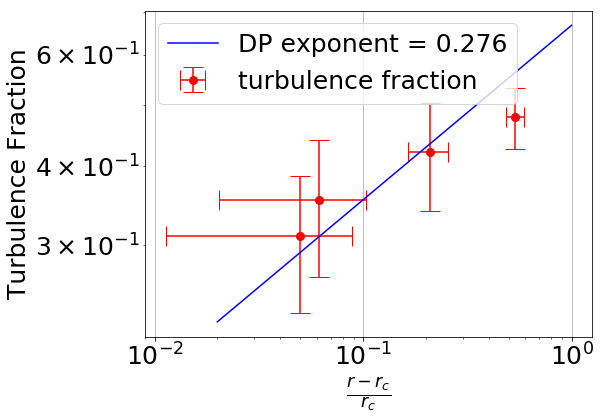

In [18]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
#ax.errorbar(re_x, tf_list[3:], yerr=error_list[3:], xerr = re_x_error, color = 'blue', ecolor = 'blue', ls = '--', marker = 'o', 
#             markersize=8, mfc = 'blue', capsize=10, label = 'turbulence fraction')
ax.errorbar(re_x, tf_list[3:], yerr=error_list[3:], xerr = re_x_error, color = 'red', ls = 'none', ecolor = 'red', marker = 'o', 
             markersize=8, mfc = 'red', capsize=10, label = 'turbulence fraction')
ax.plot(dp_x, dp_y,label = 'DP exponent = 0.276', color = 'blue')
#ax.plot(x1, tf_list[3:], '-o', label = 'sub')
ax.grid()
plt.legend()
plt.xlabel(r'$\frac{r - r_c}{r_c}$')
plt.ylabel('Turbulence Fraction')
ax.set_yscale('log')
ax.set_xscale('log')
#plt.xlim(left = 0.001)
#plt.show()
plt.savefig("/users/czhang54/scratch/tf_analysis/tf_vs_rem_log_0_003.png",bbox_inches="tight")
plt.show()
plt.close()